# Proyek Analisis Data: Bike Sharing Dataset

- Nama          : Moh. Iqbal Fatchurozi
- Email         : mohiqbalf5@gmail.com

## Pertanyaan Untuk Explorasi Data

1. Bagaimana pola penggunaan sepeda pada hari-hari biasa dibandingkan dengan akhir pekan?
2. Apakah ada perbedaan pola penggunaan sepeda antara musim panas, musim gugur, musim dingin, dan musim semi?

## Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing data

In [5]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df_day.duplicated().sum()

0

In [7]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df_hour.duplicated().sum()

0

### Cleaning Data

In [9]:
df_day.drop_duplicates(inplace=True)

In [10]:
df_hour.drop_duplicates(inplace=True)

In [11]:
df_day.rename(columns={'dteday':'Date','yr':'Year','mnth':'month','hum':'humidity','cnt':'count'},inplace =True)
df_day.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
df_day.to_csv("main_data.csv")

## Exploratory Data Analysis (EDA)

### Eksplorasi data df_day

In [13]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   Date        731 non-null    object 
 2   season      731 non-null    int64  
 3   Year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.1+ KB


In [14]:
df_day.describe(include="all")

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [15]:
df_day['season']=df_day.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
df_day['month']=df_day.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_day['weathersit']=df_day.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df_day['weekday']=df_day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df_day.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
df_day.groupby(by="season").agg({
    "instant": "nunique",
    "count": "sum",
})

,instant,count
season,,
fall,188,1061129
spring,181,471348
summer,184,918589
winter,178,841613


Dilihat dari pivot table di atas, pada **musim gugur** penggunaan sepeda adalah yang paling tinggi dibanding musim lain. **Musim semi** menjadi musim dimana penggunaan paling rendah.

In [17]:
df_day.groupby(by="weekday").agg({
    "instant": "nunique",
    "count": "sum",
})

,instant,count
weekday,,
Fri,104,487790
Mon,105,455503
Sat,105,477807
Sun,105,444027
Thu,104,485395
Tue,104,469109
Wed,104,473048


Dilihat dari pivot table di atas, penggunaan sepeda paling tinggi pada hari **jumat** dengan total 487790.

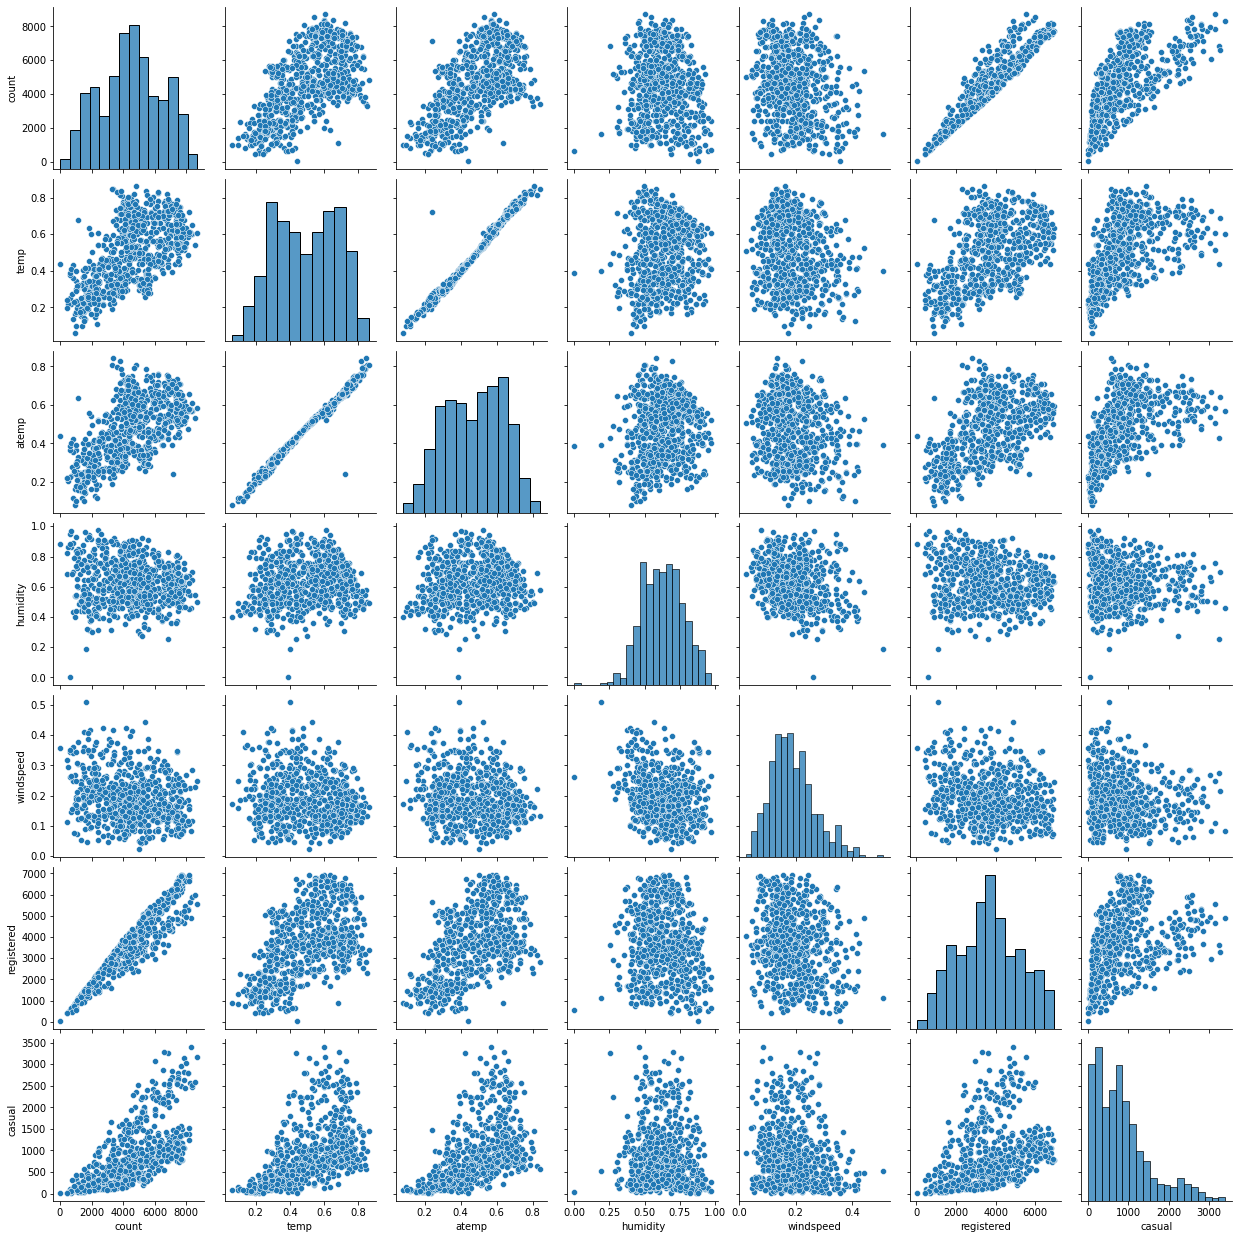

In [18]:
sns.pairplot(df_day,vars = ['count',"temp",'atemp', "humidity",'windspeed','registered','casual'])
plt.show()

Dapat diamati bahwa:
- Jumlah total sepeda yang dipinjam berkorelasi dengan suhu.
- Jumlah total tidak dipengaruhi oleh kecepatan angin dan kelembaban.

#### Scatter plot untuk variabel kategorik

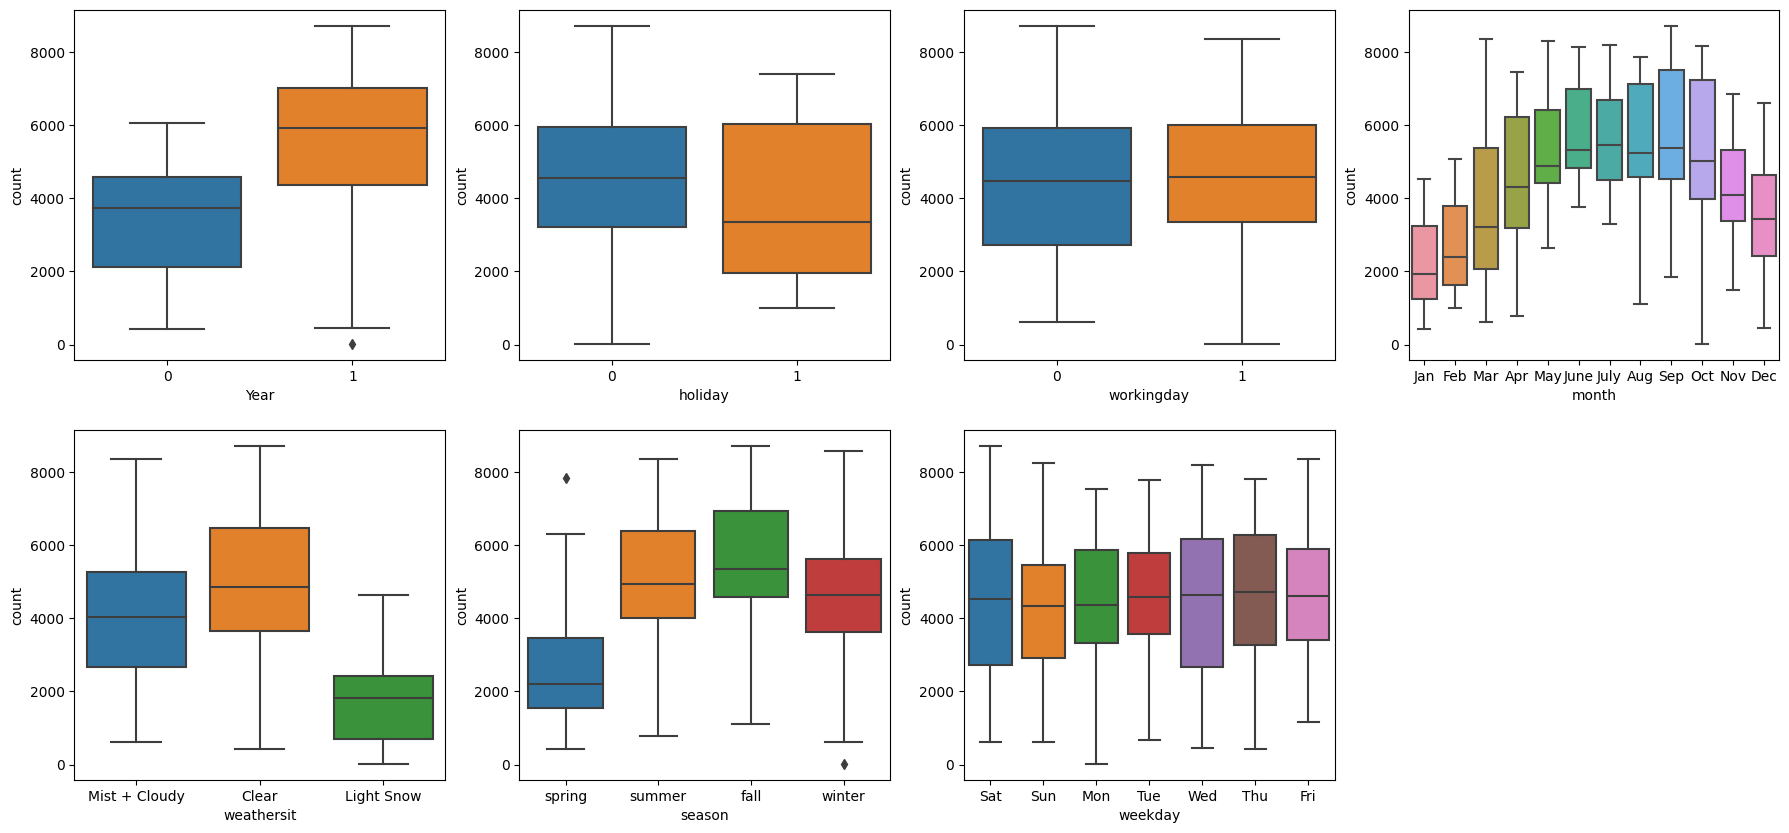

In [19]:
plt.figure(figsize=(22, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = df_day)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = df_day)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = df_day)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = df_day)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df_day)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = df_day)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = df_day)

plt.show()


Dari Plot diatas dapat dilihat bahwa:
1. Lebih banyak penyewaan sepeda pada tahun 2019.
2. Sama banyaknya penyewaan sepeda pada hari libur dan hari non-libur.
3. Hari kerja tidak berpengaruh.
4. Puncak penyewaan terjadi pada Agustus hingga Oktober.
5. Lebih banyak penyewaan pada cuaca cerah.
6. Lebih banyak penyewaan pada musim gugur.



## Visualization & Explanatory Analysis

### Pertanyaan 1

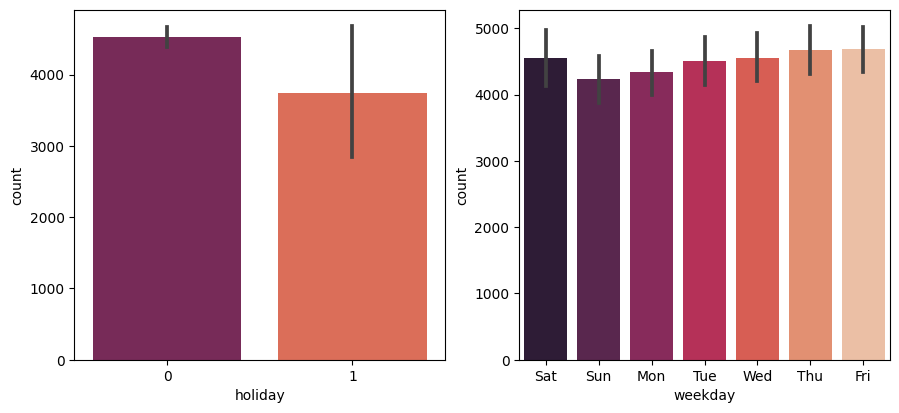

In [20]:
plt.figure(figsize=(22, 10))
plt.subplot(2,4,1)
sns.barplot(x='holiday',y='count',data=df_day,palette="rocket",)
plt.subplot(2,4,2)
sns.barplot(x='weekday',y='count',data=df_day,palette="rocket",)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa pengunaan sepeda di hari biasa dan akhir pekan tidak ada **perbedaan signifikan**. Pengunaan terbesar di hari **jumat** dan **kamis**.

### Pertanyaan 2

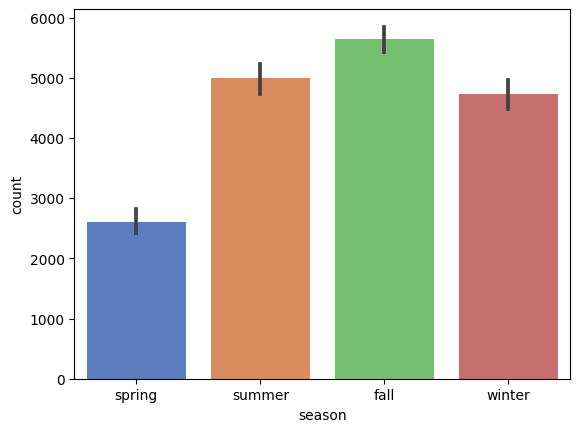

In [21]:
sns.barplot(x='season',y='count',palette="muted",data=df_day)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa pengunaan sepeda di **musim gugur** adalah **paling tinggi** dibanding musim yang lain. Pengunaan terkecil sepeda di musim **semi**.

## Kesimpulan

- Tidak ada perbedaan signifikan dalam penggunaan sepeda antara **hari biasa dan akhir pekan**. Penggunaan sepeda paling tinggi terjadi pada hari Jumat dan Kamis. Hal ini menunjukkan bahwa orang-orang cenderung menggunakan sepeda dengan intensitas yang relatif serupa baik pada hari kerja maupun akhir pekan. Informasi ini dapat membantu dalam perencanaan pengelolaan layanan sepeda, termasuk alokasi sumber daya dan pengaturan jadwal untuk memenuhi permintaan yang konsisten sepanjang minggu.


- Penggunaan sepeda pada **musim gugur** adalah yang paling tinggi dibandingkan dengan musim lainnya. Sedangkan, penggunaan sepeda paling rendah terjadi pada musim semi. Hal ini menunjukkan bahwa musim gugur menjadi periode dengan permintaan tertinggi untuk layanan sepeda, sementara musim semi memiliki permintaan yang lebih rendah. Informasi ini dapat membantu dalam perencanaan dan pengelolaan layanan sepeda, termasuk alokasi sumber daya dan strategi pemasaran yang tepat untuk setiap musim.
